In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch
import torch.nn as nn
from collections import defaultdict
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,FastICA
from torch.utils.data.sampler import BatchSampler
import pandas as pd
import matplotlib.animation as animation
import matplotlib.cm as cm
import scipy as sc
from skimage.metrics import structural_similarity as ssim
from sklearn.cluster import KMeans,OPTICS,DBSCAN
import math
from joblib import Memory,Parallel,delayed,parallel_backend
import time
from multiprocessing import Lock, Process, Queue
import multiprocessing
import queue 
import os
import networkx as nx
from scipy.spatial.transform import Rotation as R
import sklearn

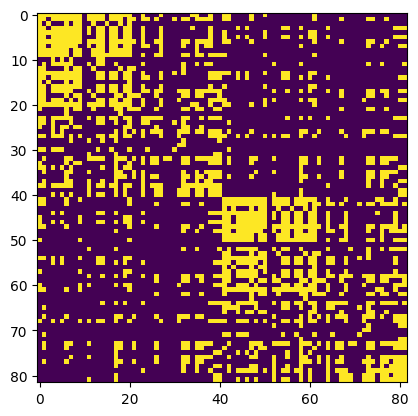

In [47]:
structural = np.loadtxt("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/structural.txt")
plt.imshow(structural > 2)

In [85]:
timeseries = np.load("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/nsm_timeseries/cocomac/timeseries.npy")
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/metadata.tsv", sep="\t")
id_sessions_awake = np.array([i for i in range(len(meta)//464) if meta["condition"].iloc[i*464] in ["awake"] and meta["monkey"]])
timeseries_awake = np.swapaxes(timeseries[id_sessions_awake,:,:],1,2)
timeseries_awake_all = np.swapaxes(np.swapaxes(timeseries[id_sessions_awake,:,:],1,2),0,1).reshape(82,-1)
id_sessions_light_propofol = np.array([i for i in range(len(meta)//464) if meta["condition"].iloc[i*464] in ["light-propofol"]])
timeseries_light_propofol_all = np.swapaxes(np.swapaxes(timeseries[id_sessions_light_propofol,:,:],1,2),0,1).reshape(82,-1)
id_sessions_deep_propofol = np.array([i for i in range(len(meta)//464) if meta["condition"].iloc[i*464] in ["deep-propofol"]])
timeseries_deep_propofol_all = np.swapaxes(np.swapaxes(timeseries[id_sessions_deep_propofol,:,:],1,2),0,1).reshape(82,-1)

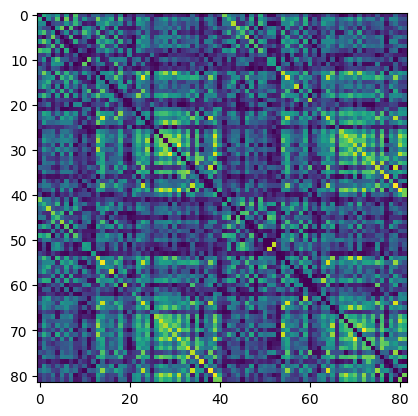

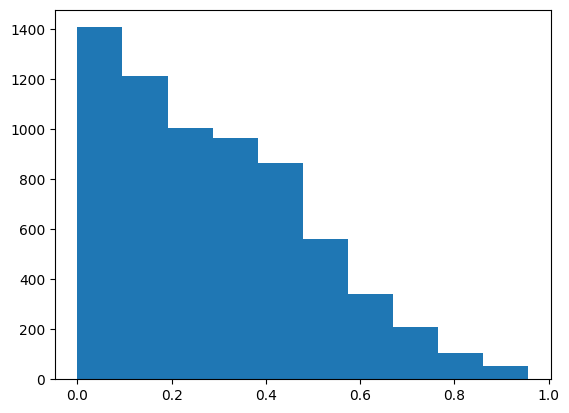

1886.0


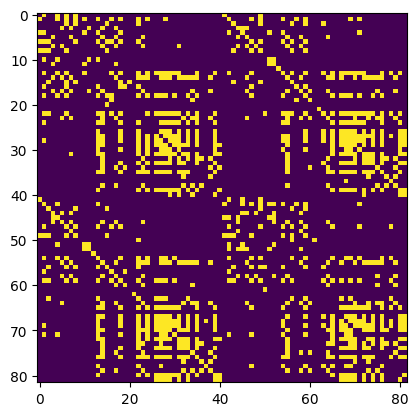

In [97]:
dfc_awake = np.abs(np.corrcoef(timeseries_awake_all))
np.fill_diagonal(dfc_awake,0)
plt.imshow(dfc_awake)
plt.show()
plt.hist(dfc_awake.flatten())
plt.show()
plt.imshow(dfc_awake > 0.5)
print(np.sum((dfc_awake > 0.5) * structural))

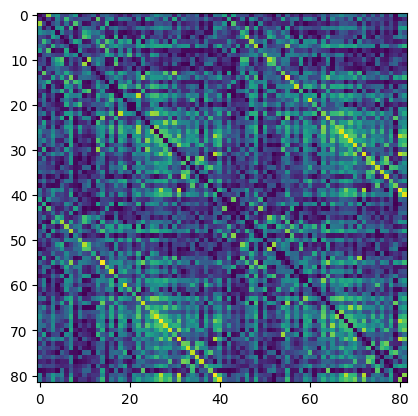

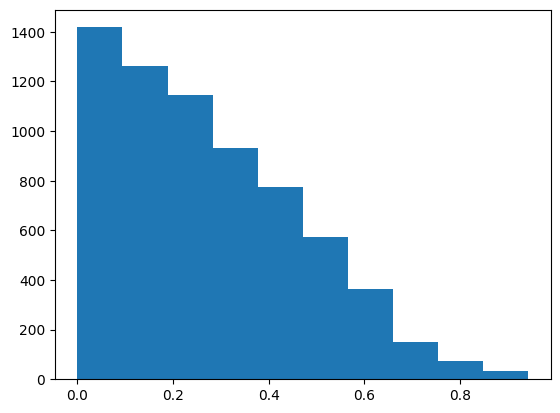

1597.0


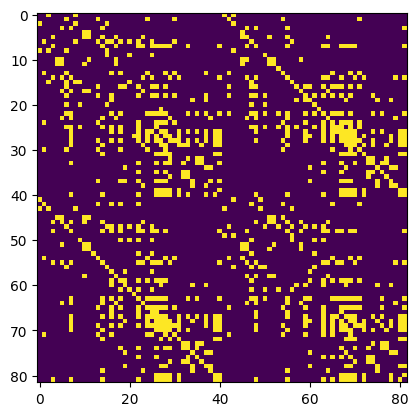

In [96]:
dfc_light = np.abs(np.corrcoef(timeseries_light_propofol_all))
np.fill_diagonal(dfc_light,0)
plt.imshow(dfc_light)
plt.show()
plt.hist(dfc_light.flatten())
plt.show()
plt.imshow(dfc_light > 0.5)
print(np.sum((dfc_light > 0.5) * structural))

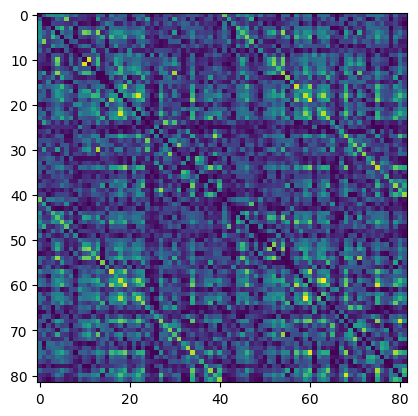

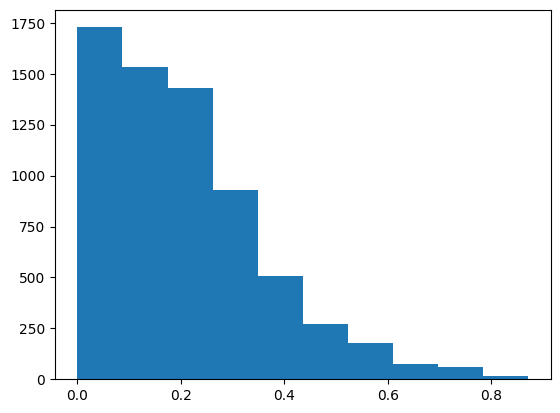

649.0


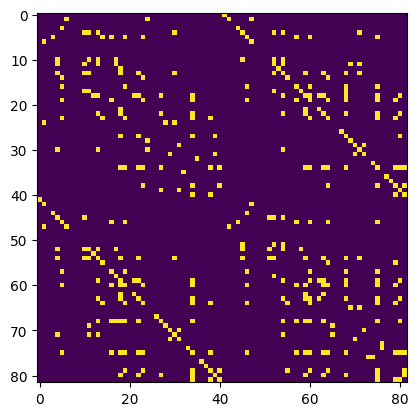

In [95]:
dfc_deep = np.abs(np.corrcoef(timeseries_deep_propofol_all))
np.fill_diagonal(dfc_deep,0)
plt.imshow(dfc_deep)
plt.show()
plt.hist(dfc_deep.flatten())
plt.show()
plt.imshow(dfc_deep > 0.5)
print(np.sum((dfc_deep > 0.5) * structural))

In [63]:
print(np.sum((dfc_deep > 0.05) * (dfc_light > 0.05)))
print(np.sum((dfc_awake > 0.05) * (dfc_light > 0.05)))
print(np.sum((dfc_awake > 0.05) * (dfc_deep > 0.05)))

42
36
34


In [58]:
82*82

6724